In [1]:
import torch as t
from torch import nn

In [2]:
class Linear(nn.Module):
    def __init__(self, in_featrues, out_features):
        super(Linear, self).__init__()
        self.w = nn.Parameter(t.randn(in_featrues, out_features))
        self.b = nn.Parameter(t.randn(out_features))
    def forward(self, x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)
    

In [3]:
layer = Linear(4, 3)
input = t.randn(2, 4, requires_grad=True)
out = layer(input)


In [4]:
out

tensor([[ 2.1634,  1.1678,  4.2395],
        [ 1.4322, -1.5475, -2.8332]], grad_fn=<AddBackward0>)

In [5]:
for name, parameter in layer.named_parameters():
    print(name, parameter)

w Parameter containing:
tensor([[ 0.8575,  0.0103,  0.0938],
        [-0.7795, -0.3393, -1.2562],
        [-0.0170, -1.0755, -1.2134],
        [-1.8247, -0.1645,  0.7505]], requires_grad=True)
b Parameter containing:
tensor([-0.2505, -0.5641,  1.2152], requires_grad=True)


In [6]:
class Perception(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2  =Linear(hidden_features, out_features)
    
    def forward(self, x):
        x = self.layer1(x)
        x = torch.sigmoid(x)
        return self.layer2(x)

In [7]:
perception = Perception(3, 4, 1)

In [8]:
for name, parameters, in perception.named_parameters():
    print(name, parameters)

layer1.w Parameter containing:
tensor([[ 0.3287,  1.6918, -0.7624,  0.4076],
        [ 0.1302,  0.8111,  0.3484,  0.6791],
        [-0.6547,  0.2305,  1.5347,  0.2744]], requires_grad=True)
layer1.b Parameter containing:
tensor([-0.7209, -0.2293,  0.2141,  1.6730], requires_grad=True)
layer2.w Parameter containing:
tensor([[-1.4375],
        [ 0.3888],
        [ 0.4902],
        [-1.4359]], requires_grad=True)
layer2.b Parameter containing:
tensor([1.9325], requires_grad=True)


In [9]:
nn.layer?


Object `nn.layer` not found.


In [10]:
from PIL import Image

In [11]:
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()
lena = Image.open('lena.png')

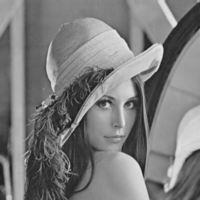

In [12]:
lena

In [13]:
input = to_tensor(lena).unsqueeze(0)

In [14]:
kernel = t.ones(3, 3) /-3

In [15]:
kernel[1][1]

tensor(-0.3333)

In [16]:
conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
conv.weight.data = kernel.view(1, 1,3, 3)
out = conv(input)

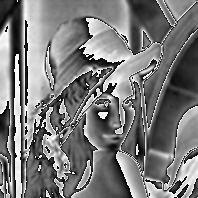

In [17]:
to_pil(out.data.squeeze(0))

In [18]:
out.shape

torch.Size([1, 1, 198, 198])

In [19]:
out.data.shape

torch.Size([1, 1, 198, 198])

In [20]:
out.data.squeeze(0).shape

torch.Size([1, 198, 198])

In [21]:
pool = nn.AvgPool2d(2, 2)
list(pool.parameters())


[]

In [22]:
out = pool(input)

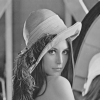

In [23]:
to_pil(out.data.squeeze(0))

In [24]:
out.shape

torch.Size([1, 1, 100, 100])

In [25]:
input = t.randn(2, 3)
linear = nn.Linear(3, 4)
h = linear(input)
h

tensor([[-0.7336, -0.6146,  0.8208,  0.5669],
        [-0.6047,  0.3516,  1.2930, -0.5228]], grad_fn=<AddmmBackward>)

In [26]:
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)

In [27]:
bn_out = bn(h)
bn_out.mean(0), bn_out.var(0, unbiased=False)

(tensor([0.0000e+00, 0.0000e+00, 4.7684e-07, 0.0000e+00],
        grad_fn=<MeanBackward0>),
 tensor([15.9616, 15.9993, 15.9971, 15.9995], grad_fn=<VarBackward1>))

In [28]:
bn_out

tensor([[-3.9952, -3.9999, -3.9996,  3.9999],
        [ 3.9952,  3.9999,  3.9996, -3.9999]],
       grad_fn=<NativeBatchNormBackward>)

In [29]:
drop = nn.Dropout(0.5)

In [30]:
o = drop(bn_out)

In [31]:
o

tensor([[-7.9904, -0.0000, -0.0000,  0.0000],
        [ 7.9904,  0.0000,  0.0000, -7.9999]], grad_fn=<MulBackward0>)

In [32]:
relu = nn.ReLU(inplace = True)

In [33]:
input = t.randn(2, 3)
input

tensor([[-0.4162, -0.2250,  0.0872],
        [ 0.8319, -1.7114,  0.7057]])

In [34]:
output = relu(input)

In [35]:
output

tensor([[0.0000, 0.0000, 0.0872],
        [0.8319, 0.0000, 0.7057]])

In [36]:
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3,3))
net1.add_module('batchnorm', nn.BatchNorm2d(3))
net1.add_module('activation_layer', nn.ReLU())


In [37]:
net2 = nn.Sequential(
    nn.Conv2d(3, 3, 3),
    nn.BatchNorm2d(3), 
    nn.ReLU()
    )

In [38]:
from collections import OrderedDict

In [39]:
net3 = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3,3,3)), 
    ('bn1', nn.BatchNorm2d(3)), 
    ('relu1', nn.ReLU())
]))

In [40]:
net1

Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_layer): ReLU()
)

In [41]:
net2

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)

In [42]:
net3

Sequential(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
)

In [43]:
net1.conv

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))

## 

In [44]:
net2[0]

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))

In [45]:
input = t.rand(1, 3, 4 ,4)

In [46]:
input

tensor([[[[0.0584, 0.0537, 0.9050, 0.2694],
          [0.1972, 0.7540, 0.1550, 0.7522],
          [0.4410, 0.5413, 0.1554, 0.0920],
          [0.3233, 0.5467, 0.1967, 0.0722]],

         [[0.4158, 0.1473, 0.5837, 0.2907],
          [0.7136, 0.6686, 0.8427, 0.9446],
          [0.7277, 0.1919, 0.3704, 0.2502],
          [0.8618, 0.4629, 0.2352, 0.7640]],

         [[0.8500, 0.4461, 0.7578, 0.4670],
          [0.4118, 0.5788, 0.2273, 0.1168],
          [0.6516, 0.1005, 0.0649, 0.4791],
          [0.3673, 0.4889, 0.2340, 0.0603]]]])

In [47]:
output = net1(input)

In [48]:
output

tensor([[[[0.0000, 0.0000],
          [0.3553, 0.6590]],

         [[0.1270, 0.0000],
          [0.1196, 0.1125]],

         [[0.7015, 0.0000],
          [0.0000, 0.0000]]]], grad_fn=<ThresholdBackward0>)

In [49]:
output = net2(input)
output

tensor([[[[0.0000, 0.4090],
          [0.0000, 0.1567]],

         [[0.0000, 0.2152],
          [0.0000, 0.1161]],

         [[0.4523, 0.0000],
          [0.8773, 0.0000]]]], grad_fn=<ThresholdBackward0>)

In [54]:
input = t.randn(2, 3,4)
input
# batch size = 3, length = 2, each is 4 d


tensor([[[ 1.1105,  1.8637,  0.2018,  0.4619],
         [ 2.4113, -1.3941,  0.9311,  1.8917],
         [-0.9842,  0.4265, -2.2880, -2.1009]],

        [[ 0.5984,  0.2152,  1.0891,  0.0808],
         [ 0.3749, -2.3495, -1.3026,  0.6613],
         [ 0.0153,  1.1440, -0.5070, -1.4041]]])

In [61]:
# 4-d, 3 hidden, 1layer
lstm = nn.LSTM(4, 3, 1)


In [62]:
# 1 layer, batchsize = 3, 3 hidden
h0 = t.randn(1, 3, 3)

In [63]:
h0

tensor([[[ 0.4396, -0.8631,  1.4456],
         [ 0.0112, -0.7033,  0.5732],
         [-0.9660,  0.7595, -0.4440]]])

In [64]:
c0 = t.randn(1, 3 ,3)

In [65]:
c0

tensor([[[ 1.1309,  2.4302,  0.4479],
         [ 0.1032, -0.6307, -0.4834],
         [-0.0305, -0.7466, -0.1629]]])

In [69]:
out , (h1, c1) = lstm(input, (h0, c0))

In [67]:
out

tensor([[[ 0.0991,  0.5282,  0.4650],
         [-0.0141,  0.1604,  0.1666],
         [ 0.1531, -0.2617, -0.0325]],

        [[-0.0428,  0.2298,  0.4856],
         [-0.0046,  0.4140,  0.0971],
         [ 0.0367, -0.0981, -0.1337]]], grad_fn=<StackBackward>)

In [70]:
h1

tensor([[[-0.0428,  0.2298,  0.4856],
         [-0.0046,  0.4140,  0.0971],
         [ 0.0367, -0.0981, -0.1337]]], grad_fn=<StackBackward>)

In [71]:
c1

tensor([[[-0.0983,  0.6339,  0.7946],
         [-0.0062,  0.5419,  0.2292],
         [ 0.0817, -0.1798, -0.3886]]], grad_fn=<StackBackward>)

In [72]:
input.shape

torch.Size([2, 3, 4])

In [74]:
input = t.randn(2, 3,4)

In [75]:
lstm = nn.LSTMCell(4, 3)
hx = t.randn(3, 3)
cx = t.randn(3, 3)
# each lstm cell is one layer

In [76]:
out = []
for i_ in input:
    hx, cx = lstm(i_, (hx, cx))
    out.append(hx)
t.stack(out)

tensor([[[ 0.3482,  0.0617, -0.3794],
         [-0.0632, -0.0286,  0.2652],
         [-0.0858,  0.1876,  0.2629]],

        [[ 0.3776,  0.0520, -0.4224],
         [ 0.1127,  0.1473, -0.1296],
         [ 0.0632,  0.3182, -0.1859]]], grad_fn=<StackBackward>)

In [77]:
out

[tensor([[ 0.3482,  0.0617, -0.3794],
         [-0.0632, -0.0286,  0.2652],
         [-0.0858,  0.1876,  0.2629]], grad_fn=<MulBackward0>),
 tensor([[ 0.3776,  0.0520, -0.4224],
         [ 0.1127,  0.1473, -0.1296],
         [ 0.0632,  0.3182, -0.1859]], grad_fn=<MulBackward0>)]

In [78]:
embedding = nn.Embedding(4, 5)

In [79]:
embedding

Embedding(4, 5)

In [80]:
embedding.weight.data = t.arange(0, 20).view(4, 5)

In [81]:
embedding

Embedding(4, 5)

In [82]:
embedding.weight

Parameter containing:
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]], requires_grad=True)

In [86]:
input  = t.arange(3, 0, -1).long()

In [87]:
input

tensor([3, 2, 1])

In [89]:
input.type()

'torch.LongTensor'

In [90]:
output = embedding(input)

In [95]:
label = t.Tensor([1, 0, 1]).long()

In [96]:
label

tensor([1, 0, 1])

In [94]:
score = t.randn(3, 2)

In [99]:
criterion = nn.CrossEntropyLoss()

In [100]:
loss = criterion(score, label)

In [101]:
loss

tensor(1.5374)

In [104]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(), 
            nn.Linear(120, 84), 
            nn.ReLU(),
            nn.Linear(84, 10)
            )
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16*5*5)
        x = self.classifier(x)
        return x
net = Net()

In [105]:
net

Net(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [106]:
from torch import optim

In [107]:
optimizer = optim.SGD(params=net.parameters(), lr =1)
optimizer.zero_grad()
input = t.randn(1, 3, 32, 32)
output = net(input)
output.backward(output)

In [109]:
output

tensor([[-0.0608, -0.0055, -0.0025, -0.1370,  0.1216, -0.0482, -0.0467,  0.0219,
         -0.0502,  0.1342]], grad_fn=<AddmmBackward>)

In [110]:
# set lr
optimizer = optim.SGD([
    {'params':net.features.parameters()},
    {'params':net.classifier.parameters(), 'lr':1e-2}
], lr=1e-5)

In [112]:
# only set up larger lr for two dense layer
special_layer = nn.ModuleList([net.classifier[0], net.classifier[3]])
special_layer_params = list(map(id, special_layer.parameters()))
base_params = filter(lambda p:id(p) not in special_layer_params, net.parameters())

In [115]:
optimizer = t.optim.SGD([
    {'params':base_params}, 
    {'params':special_layer.parameters(), 'lr':0.01}
], lr=0.001)

In [116]:
optimizer.zero_grad()
input = t.randn(1, 3, 32, 32)
output = net(input)
output.backward(output)

In [117]:
output

tensor([[-0.0693,  0.0108, -0.0079, -0.1056,  0.0721, -0.0100, -0.0996,  0.0165,
         -0.0694,  0.1457]], grad_fn=<AddmmBackward>)